In [ ]:
import xarray as xr
import rasterio as rio
import pandas as pd 
from rasterio.plot import show
import matplotlib.pyplot as plt
import rioxarray
import imageio
import glob

In [ ]:
ds_ice = xr.open_dataset("Data/MODEL.ICE.HAD187001-198110.OI198111-202109.nc")

In [ ]:
ice = ds_ice.rio.write_crs(4326, inplace=True)

In [ ]:
ice_time = pd.DataFrame(columns=['year', 'ice_conc'])

In [ ]:
ice_year = []

ice_conc = []

In [ ]:
for i in range(0, 40):
    
    ice_i = float(ice['SEAICE'][1341 + (12 * i)].mean())

    year_i = 1981 + i

    ice_year.append(year_i)

    ice_conc.append(ice_i)

In [ ]:
ice_time['year'] = ice_year
ice_time['ice_conc'] = ice_conc

In [ ]:
ice_time

,year,ice_conc
0,1981,24.723967
1,1982,24.581732
2,1983,24.599352
3,1984,23.901114
4,1985,23.986412
5,1986,24.489408
6,1987,24.082897
7,1988,24.113588
8,1989,23.921965
9,1990,23.706593


Text(0, 0.5, 'Ice concentration')

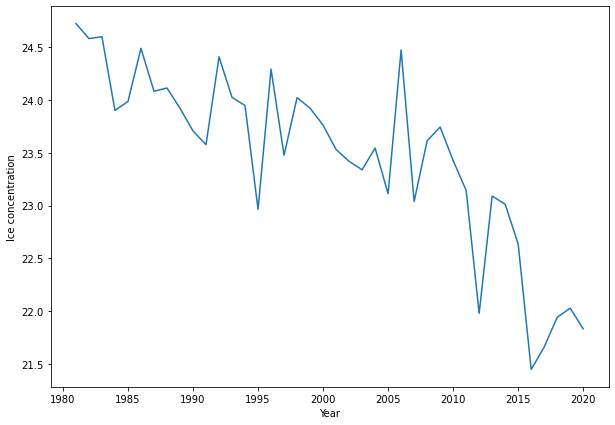

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(ice_time['year'], ice_time['ice_conc'])
plt.xlabel('Year')
plt.ylabel('Ice concentration')

In [ ]:
filenames = sorted(glob.glob('*1017.nc'))

new = [xr.open_dataset(f).to_dataframe(dim_order=None) for f in filenames]

df = pd.concat(new)

df

In [ ]:
# subset the columns
df_subset = df['sst']
# drop NA's
df_subset_no_na = df_subset.dropna()
# group by time and take the annual means
sst_means = df_subset_no_na.groupby('time').mean('sst')
# convert to a df
sst_means_df = sst_means.to_frame()
# reset the 'time' from an index to a column
sst_means_df = sst_means_df.reset_index()
sst_means_df

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(sst_means_df['time'], sst_means_df['sst'])
plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature')